
<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/Sesion_01a_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística

Si deseamos clasificar algún tipo de imagen, resultado en campos médicos, astrofísicos, se pueden aplicar algorítmos de clasificación. En particular, en esta sesión se estudia los principios básicos de  regresión logística para aplicarla a los  modelos de clasificación.

Supongamos que queremos clasificar dos tipos de objetos, basado en dos características:



In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_circles
import numpy as np

Text(0, 0.5, 'X_2')

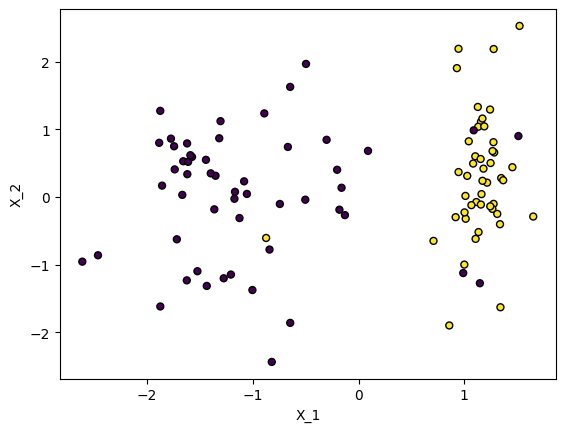

In [ ]:
X1, Y1 = make_classification(
    n_features = 2, n_redundant = 0, n_informative=1, n_clusters_per_class=1,
    random_state = 1, class_sep=1.2, flip_y = 0.15)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.xlabel("X_1")
plt.ylabel("X_2")

En este caso cada color representa los objetos tipos 0 y tipo 1. Para aplicar un algoritmo de clasificación relacionaremos el valor $h_{\theta}(X^{i})$ con la probabilidad de obtener un valor de y dado un x parametrizado por $\theta$, $P(y|x;\theta)$, asi :

 $h_{\theta}(X^{i}) = P(y|x;\theta) $

 Se cumple que:  $P(y=1|x;\theta)+P(y=0|x;\theta) = 1$

Si tenemos muestra equiprobables, podemos definir lo siguiente  para P :

- $P<0.5$ se obtienen los objetos tipo 0
- $P \geq 0.5$ se obtienen los objetos tipo 1

Podemos establecer un clasificador de los  datos  basado en las probabilidades a partir de un clasificador logístico:


\begin{equation}
f(z)=\frac{1}{(1+e^{-z})}
\end{equation}
Cuya derivada es :

\begin{equation}
f'(z)=f(z)(1-f(z))
\end{equation}



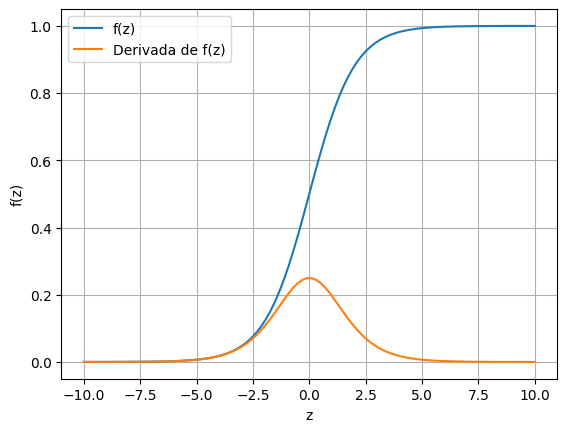

In [ ]:
f = lambda x: 1/(1+np.exp(-x))
fp = lambda x: f(x)*(1-f(x))
z=np.linspace(-10, 10, 100)

plt.figure()
plt.plot(z,f(z), label="f(z)")
plt.plot(z,fp(z), label="Derivada de f(z)")
plt.ylabel("f(z)")
plt.xlabel("z")
plt.grid()
plt.legend()

- Para valores de $z< 0.0$ la regresión logistica clasica objetos tipo 0, siendo $f(z)<0.5$
- Para valores de $z\geq 0.0$ la regresión logística clasica objetos tipo 1 siendo $f(z) \geq  0.5$

¿Cual es la probabilidad de que dado un hyperplano, los valores de un hyperlado sean objetos tipo 0 o tipo 1?

Aplicando la regresión logistica, a las regresiones multivariadas estudiadas en la sesiones anteriores, tenemos que el argumento $z=\Theta^{T} X$, es:


\begin{equation}
h_{\theta}(X)=\frac{1}{(1+e^{-\Theta^T X})}
\end{equation}


- Se cumple que para los valores del hyperplano  $\Theta^T X\geq 0.0$, $y = 1$
- Se cumple que para  $\Theta^T X < 0.0$ , $y = 0$


Las condiciones anteriores permiten definir fronteras de desición entre los datos a clasificar. Para los datos dados arriba, se puede establecer el siguiente clasificador.


$h_\theta(x) = g(\theta_0+\theta_1 x_1+\theta_2 x_2 ) $.

Una clasificación del dataset nos sugiere que la frontera para este dataset es:

$\theta_0+\theta_1 x_1+\theta_2 x_2 \geq 0.0$

Si por algun metodo encontramos  los parámetros $\Theta$, entonces podemos definir la frontera de clasificación. Como ejemplo supongamos que encontramos los siguientes parametros $\Theta=[3.0, -20, 1.0]$

Enontremos la ecuación de la recta:

$3-20x1+x2=0$

$x_2= 20 x_1 - 3$

In [ ]:
x1 = np.linspace(0, 0.29, 100)
x2 = 20*x1-3

Text(0, 0.5, 'X_2')

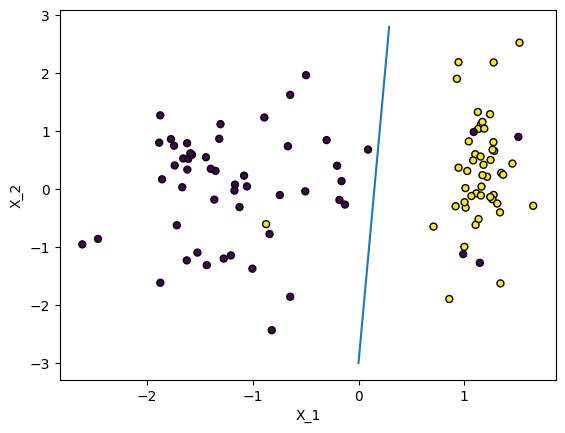

In [ ]:
X1, Y1 = make_classification(
    n_features = 2, n_redundant = 0, n_informative=1, n_clusters_per_class=1,
    random_state = 1, class_sep=1.2, flip_y = 0.15)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
plt.plot(x1, x2)
plt.xlabel("X_1")
plt.ylabel("X_2")

Por otro lado, fronteras no lineales también puede ser consideradas, para ello se puede definir  $\Theta^T X$ como función de un polinomio, por ejemplo

$\Theta^T X =  \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4$

\begin{equation}
h_\theta(X) =  \frac{1}{1+e^{\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4}}
\end{equation}

La frontera de desición en este caso esta determinada por:

$\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4 \geq 0$
para obtener un clasificador con valores de y = 1.

Para este mismo caso, supongamos que tenemos la siguiente distribución de datos, ¿Cuál es el mejor elección de parámetros $\Theta$ que permite clasificar los datos siguientes:







(-1.12244940477901, 1.1839643638442499, -1.2696420440360447, 1.185918477713659)

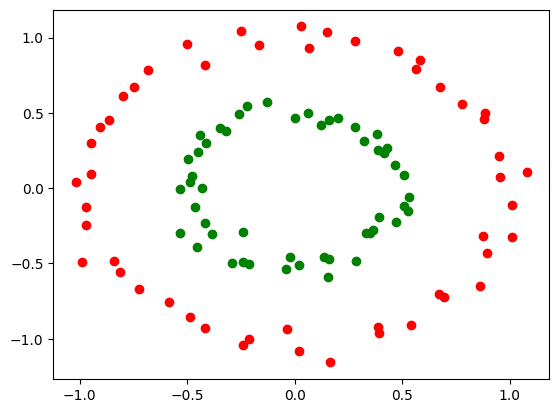

In [ ]:
X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1
f, ax = plt.subplots()
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
plt.axis("tight")

Analizando el conjunto de datos, se puede observar que la frontera es la de una circunferencia con centro en (0, 0) y radio de 0.7 aproxidamente,  asi nuestra elección de parámetros para el polinomio ejemplicado en la celda anterior ($\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 +\theta_4 x_1^4 \geq 0$ ) es:


$\Theta^T = [0.7,0, 0, 1,1 ] $

Reemplando tenemos que:

$-0.7+x_1^2+x_2^2 \geq 0$

$x_1^2+x_2^2 \geq 0.7$

Text(0, 0.5, 'X_2')

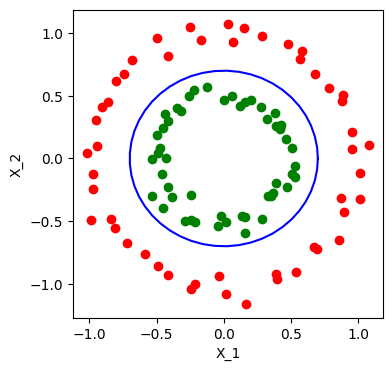

In [ ]:
#Por motivos graficos convirtamos la ecuación anterior parametrizada
#por theta

alpha = np.linspace(0, 2*np.pi)
x1=0.7*np.cos(alpha)
x2=0.7*np.sin(alpha)

X, y = make_circles(
    n_samples=100, factor=0.5, noise=0.05, random_state=0)
red = y == 0
green = y == 1

f, ax = plt.subplots(figsize=(4,4))
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")

plt.plot(x1, x2,"b-")
plt.axis("tight")
plt.xlabel("X_1")
plt.ylabel("X_2")

De forma general, ¿Cómo pueden ser encontrados los valores de $\Theta$?.



Para todo el conjunto de datos, tenemos que:

Sea $\Theta^T = [\theta_0,\theta_1,\theta_2,...,\theta_n]$ una matrix $1 \times (n+1)$ y  


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
.&. & . &.&.&.& .\\
.&. & . & .&.&.&.\\
.&. & . & .&.&.&.\\
x_n^{(1)}&x_n^{(2)} & x_n^{(3)} & .&.&.&x_n^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}


\begin{equation}
h_\theta (x)= \frac{1}{1+e^{\Theta ^T X}}
\end{equation}



Para ello, podemos definir la función de coste como :

$ J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right]$

Esta función de coste permite establecer el mejor clasificadose para la regresión logística de acuerdo a la teoría de probabilidad. Se garantiza que cuando $P(y=1|x,\theta)$ se cumple la función de coste se minimiza, penalizando los valores que sean iguales a $P(y=0|x,\theta)$, analogamente, se cumple que cuando $P(y=0|x,\theta)$ se cumple la función de coste se minimiza, penalizando los valores que sean iguales a $P(y=1|x,\theta)$.
La metrica empleada para la regresión lineal no es recomedada en este caso, dado que la funcion de coste puede presentar múltiples minimos que dificultan la minimización  a través de algunas de las técnicas empleadas. Una justificación adicional para la métrica  es dada más adelante segun la teoría de  probabilidad.

Se deja como tarea motrar que:

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)}
\end{equation}

Para la demostración, muestre que:
- $f(z)=\frac{1}{1+e^{-z}} = f(z)(1-f(z))$
- $\frac{\partial h_{\theta}}{\partial \theta_j } = h_{\theta}(X^{(i)})(1-h_{\theta}(X^{(i)}))X_j^{(i)}$


La derivada permite aplicar el gradiente descendente para minimizar nuestra función de coste asi,  nuestro algoritmo de minimización permite encontrar los valores de $\theta$ después de un conjunto determinado de iteraciones.

$\theta_j: \theta_j - \alpha \frac{\partial J}{\partial \theta_j}$


Otros metodos de minización podrian ser aplicados, tales como:


[Gradiente conjugado ](https://es.wikipedia.org/wiki/M%C3%A9todo_del_gradiente_conjugado#:~:text=En%20matem%C3%A1tica%2C%20el%20m%C3%A9todo%20del,son%20sim%C3%A9tricas%20y%20definidas%20positivas.&text=Varios%20m%C3%A9todos%20del%20gradiente%20conjugado,de%20las%20ecuaciones%20no%20lineales)

[BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)


[L-BGFS](https://en.wikipedia.org/wiki/Limited-memory_BFGS)

[Newton-Rhapson](https://en.wikipedia.org/wiki/Newton%27s_method)


# Interpretación estadística


¿Qué tan adeacuado es la elección de $J(\theta)$  para el modelo de regresión logística?



\begin{equation}
P(y=1|x;\theta)= h_{\theta}(X^{(i)})
\end{equation}

\begin{equation}
P(y=0|x;\theta)= 1-h_{\theta}(X^{(i)})
\end{equation}



\begin{equation}
P(y|x;\theta)=[h_{\theta}(X^{(i)})]^{y}[1-h_{\theta}(X^{(i)})]^{1-y}
\end{equation}

Asumiendo que los datos de entrenamiento son independientes:

$\cal{L}(\theta)=p(\vec{y}|x, \theta)$

\begin{equation}
\cal{L}(\theta)=\prod_{i=1}^{m} [h_{\theta}(X^{(i)})]^{y}[1-h_{\theta}(X^{(i)})]^{1-y}
\end{equation}

tomando el logaritmo:


\begin{equation}
\log \cal{L}(\theta)= \sum_{i=1}^{m} y \log h_{\theta}(X^{(i)}) + (1-y)(1-h_{\theta}(X^{(i)}))
\end{equation}

Los datos a considerar son los más probables es decir que para encontrar los valores de $\theta$ que nos garantizan la máxima probabilidad es necesario maximar la función anterior. Después de realizar los cálculos se puede mostrar la ecuación dada para el gradiente de la función de coste.



En conclusión se cumple que:

Para todo el conjunto de datos, tenemos que:

Sea $\Theta^T = [\theta_0,\theta_1,\theta_2,...,\theta_n]$ una matrix $1 \times (n+1)$ y  


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
.&. & . &.&.&.& .\\
.&. & . & .&.&.&.\\
.&. & . & .&.&.&.\\
x_n^{(1)}&x_n^{(2)} & x_n^{(3)} & .&.&.&x_n^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}


\begin{equation}
h_\theta (x)= \frac{1}{1+e^{\Theta ^T X}}
\end{equation}



- Función de coste
$ J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right]$

- Derivada de la función de coste
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)}
\end{equation}





# Regularización


- Overfiting y underfiting



## Regresion Lineal
Disminuir la complejidad del algoritmo




- Función de coste
\begin{equation}
J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right] + \frac{\lambda}{2m}\sum_{j=1}^{n} \theta_j^2
\end{equation}



- Derivada de la funcion de coste
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)} + \frac{\lambda}{m}\sum_{j=1}^{n} \theta_j
\end{equation}


El gradiente descendente puede ser escrito como:


\begin{equation}
\theta_j := \theta_j\left(1-\alpha \frac{\lambda}{m} \right) - \frac{1}{m}\sum_{i=1}^{m}[h_\theta X^{(i)}- y^{(i)}] X_j^{(i)}
\end{equation}



### Normal equation
\begin{equation}
\theta=(X^TX\lambda L)^{-1} X^T y
\end{equation}

\begin{equation}
\lambda=\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\end{equation}

Las dimensiones de $[\lambda]=(\mathrm{n+1}) \times (\mathrm{n+1})$



## Regresion Logistica
Disminuir la complejidad del algoritmo




- Función de coste
\begin{equation}
J (\Theta) =\frac{1}{m} \sum_{i=1}^{m} \left[-y\log (h_{\theta}(X ^ {i})) - (1-y)\log (1-h_{\theta}(X^{i})) \right] + \frac{\lambda}{2m}\sum_{j=1}^{n} \theta_j^2
\end{equation}



- Derivada de la funcion de coste
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}-h_\theta X^{(i)}] X_j^{(i)} + \frac{\lambda}{m}\sum_{j=1}^{n} \theta_j
\end{equation}


El gradiente descendente puede ser escrito como:


\begin{equation}
\theta_j := \theta_j\left(1-\alpha \frac{\lambda}{m} \right) -\alpha \frac{1}{m}\sum_{i=1}^{m}[h_\theta X^{(i)}- y^{(i)}] X_j^{(i)}
\end{equation}



Tomar el [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) desde sklearn:

```
from sklearn import datasets

iris = datasets.load_iris()
```
- Realizar la clasifición de las tres clases  a traves de una regresión logística  y realizar multiclasicación, para ello considere lo siguiente:

Si en un dataset existen más de 2 clases, $y={0, 1, 2, 3, ...}$ se debe construir una multiclasificación, una contra todos, la estrategia sugerida es la siguiente.

Sea A, B, C las tres clases. Para estos valores definir:

1. Definir la clase A como la clase 0 y todas las otras B, C como la clase 1
2. Encontrar el valor $h_\theta(X) = P(y=A|x;\theta)$
3. Definir la clase B como la clase 0 y todas las otras A, C como la clase 1
4. Encontrar el valor $h_\theta(X) = P(y=B|x;\theta)$
5. Definir la clase C como la clase 0 y todas las otras A, B como la clase 1
6. Encontrar el valor $h_\theta(X) = P(y=C|x;\theta)$




In [ ]:
from sklearn import datasets
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pylab as plt



In [ ]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X = iris["data"]
Y = iris["target"]